In [3]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.io import read_image
from torch.utils.data import Dataset
import cv2
import numpy as np
import pandas as pd
import shutil

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f"Using {device} device")

Using cuda device


In [ ]:
class MyImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.img_labels)
    
        https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [6]:
train = pd.read_csv('../data/indexes/index_train.csv')

In [12]:
shutil.copy('../data/raw/images/img_0_0.jpg', '../data/processed/train/img_0_0.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/train/img_0_0.jpg'

In [ ]:
os.

In [9]:
for row in train.itertuples():
    print(idx.file_name)

../../data/raw/images/img_113_1.jpg
../../data/raw/images/img_456_2.jpg
../../data/raw/images/img_72_2.jpg
../../data/raw/images/img_402_2.jpg
../../data/raw/images/img_773_0.jpg
../../data/raw/images/img_182_4.jpg
../../data/raw/images/img_29_3.jpg
../../data/raw/images/img_165_0.jpg
../../data/raw/images/img_580_1.jpg
../../data/raw/images/img_238_2.jpg
../../data/raw/images/img_881_4.jpg
../../data/raw/images/img_628_1.jpg
../../data/raw/images/img_371_3.jpg
../../data/raw/images/img_401_1.jpg
../../data/raw/images/img_148_3.jpg
../../data/raw/images/img_644_0.jpg
../../data/raw/images/img_504_4.jpg
../../data/raw/images/img_485_4.jpg
../../data/raw/images/img_233_2.jpg
../../data/raw/images/img_750_1.jpg
../../data/raw/images/img_429_0.jpg
../../data/raw/images/img_228_4.jpg
../../data/raw/images/img_652_3.jpg
../../data/raw/images/img_591_2.jpg
../../data/raw/images/img_380_3.jpg
../../data/raw/images/img_810_0.jpg
../../data/raw/images/img_777_3.jpg
../../data/raw/images/img_845_

In [4]:
trs = transforms.Compose([transforms.ToTensor()])
dataset = datasets.ImageFolder('../data/raw/images', transform=trs)

FileNotFoundError: Couldn't find any class folder in ../data/raw/images.

In [12]:
img_test = cv2.imread('../data/raw/images/img_0_0.jpg',cv2.IMREAD_UNCHANGED)

In [13]:
test = np.random.randint(0,255,size=(1,8,8))
test = test/255

In [134]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [135]:
net = nn.Sequential()

# net.add_module('flatten', nn.Flatten())
# net.add_module(f'lin1',nn.Linear(784,128))
# net.add_module(f'act1',nn.ReLU())
# net.add_module(f'drop1',nn.Dropout(0.2))
# net.add_module(f'lin2',nn.Linear(128,64))
# net.add_module(f'act2',nn.ReLU())
# net.add_module(f'drop2',nn.Dropout(0.2))
    
# net.add_module(f'out',nn.Linear(64,10))

net.add_module('conv_2d_1', nn.Conv2d(1, 6, kernel_size=(2,2)))
net.add_module('relu', nn.ReLU())
net.add_module('maxpool', nn.MaxPool2d(kernel_size=(2,2)))
net.add_module('drop', nn.Dropout(0.2))
net.add_module('flatten', nn.Flatten())
net.add_module('linear1', nn.Linear(1014,10))

net

Sequential(
  (conv_2d_1): Conv2d(1, 6, kernel_size=(2, 2), stride=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout(p=0.2, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=1014, out_features=10, bias=True)
)

In [136]:
optmizer = optim.SGD(net.parameters(), lr = 1e-3)

size = len(train_dataloader)
net.train()
for batch, (X,y) in enumerate(train_dataloader):
    pred = net(X)
    loss_fn = nn.CrossEntropyLoss()
    loss = loss_fn(pred, y)
    
    loss.backward()
    optmizer.step()
    optmizer.zero_grad()
    
    if batch % 100 == 0:
        loss, current = loss.item(), batch
        print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

loss: 2.311178  [    0/  938]
loss: 2.251246  [  100/  938]
loss: 2.200543  [  200/  938]
loss: 2.128492  [  300/  938]
loss: 2.054784  [  400/  938]
loss: 1.990930  [  500/  938]
loss: 1.932576  [  600/  938]
loss: 1.817232  [  700/  938]
loss: 1.791297  [  800/  938]
loss: 1.608771  [  900/  938]


In [50]:
arr = list(train_dataloader)[0]

In [51]:
arr[0].shape

torch.Size([64, 1, 28, 28])

In [58]:
net(arr[0]).argmax(dim=1)

tensor([4, 2, 3, 3, 7, 1, 3, 4, 3, 4, 3, 2, 3, 3, 3, 4, 4, 2, 4, 3, 3, 3, 3, 4,
        3, 7, 2, 2, 3, 3, 3, 7, 3, 3, 3, 7, 7, 3, 3, 3, 6, 4, 7, 3, 2, 7, 4, 4,
        2, 7, 4, 7, 4, 6, 3, 3, 6, 7, 6, 7, 4, 3, 3, 3])

In [59]:
arr[1]

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3,
        0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5])

https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

In [76]:
net(input_image)

RuntimeError: mat1 and mat2 must have the same dtype

In [13]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        for n in range(N_LAYERS):
            pass

In [15]:
net = nn.Sequential()

In [17]:
net.add_module('act1',nn.ReLU())
net.add_module('linear1',nn.Linear(20,10))
net.add_module('conv1',nn.Conv2d(32,64,(3,3)))

In [18]:
print(net)

Sequential(
  (act1): ReLU()
  (linear1): Linear(in_features=20, out_features=10, bias=True)
  (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
)


In [60]:
import pandas as pd
import glob
import cv2
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [43]:
data = load_digits()
img_test = data['images'][0]
arr = cv2.imread('test.png', cv2.IMREAD_UNCHANGED)

In [72]:
import os

In [73]:
os.path.join('../data/raw/images','*.jpg')

'../data/raw/images/*.jpg'

In [56]:
int("../data/raw/images/img_727_1.jpg".split('_')[-1].replace('.jpg', ''))

1

In [71]:
df_train, df_test = (
    pd.DataFrame(glob.glob('../data/raw/images/*.jpg'), columns=['file_name'])
    .assign(target = lambda x: x.file_name.apply(lambda z: int(z.split('_')[-1].replace('.jpg', ''))))
    .pipe((train_test_split),test_size=0.2, random_state=42)
)

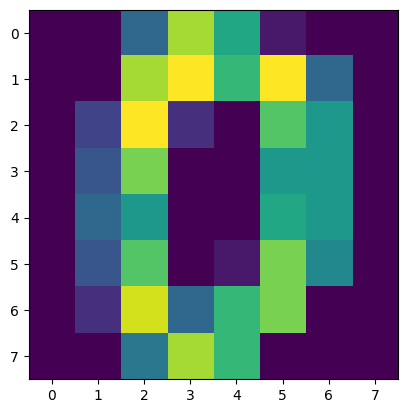

In [27]:
plt.imshow(img_test)

In [25]:
Image.fromarray(img_test, mode='L')

In [28]:
arr = cv2.imread('../data/raw/images/img_0_0.jpg')

In [30]:
arr.shape

(8, 8, 3)

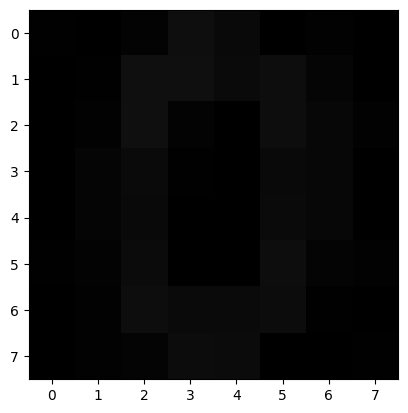

In [13]:
plt.imshow(arr, cmap='viridis')